In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("airline-passengers.csv", index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index.freq='MS'

In [5]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
fitted_model = ExponentialSmoothing(train_data['Passengers'], trend ='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\CHS9NA\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [8]:
test_predictions = fitted_model.forecast(36)

In [9]:
test_predictions

1958-02-01    339.142936
1958-03-01    399.281658
1958-04-01    394.233585
1958-05-01    402.545237
1958-06-01    473.128718
1958-07-01    521.795297
1958-08-01    514.513626
1958-09-01    446.216849
1958-10-01    385.430976
1958-11-01    339.645119
1958-12-01    381.455674
1959-01-01    401.210179
1959-02-01    387.159171
1959-03-01    455.812400
1959-04-01    450.049615
1959-05-01    459.538040
1959-06-01    540.114810
1959-07-01    595.671656
1959-08-01    587.359039
1959-09-01    509.392728
1959-10-01    440.000724
1959-11-01    387.732453
1959-12-01    435.462593
1960-01-01    458.013964
1960-02-01    441.973598
1960-03-01    520.346828
1960-04-01    513.768142
1960-05-01    524.599948
1960-06-01    616.584867
1960-07-01    680.007514
1960-08-01    670.517987
1960-09-01    581.513119
1960-10-01    502.296517
1960-11-01    442.628046
1960-12-01    497.115873
1961-01-01    522.860092
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

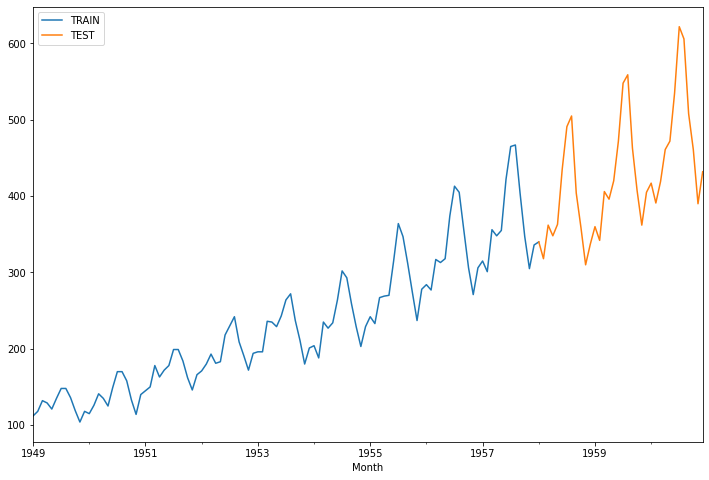

In [11]:
train_data['Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 8))
test_data['Passengers'].plot(legend=True, label='TEST')

<Axes: xlabel='Month'>

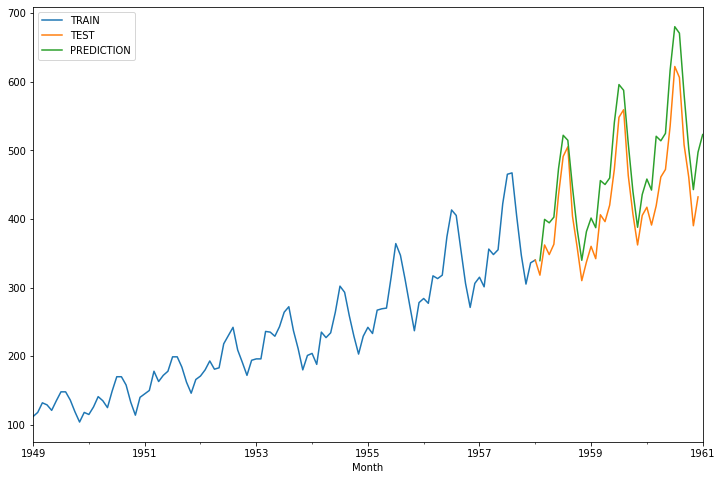

In [13]:
train_data['Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 8))
test_data['Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION')

<Axes: xlabel='Month'>

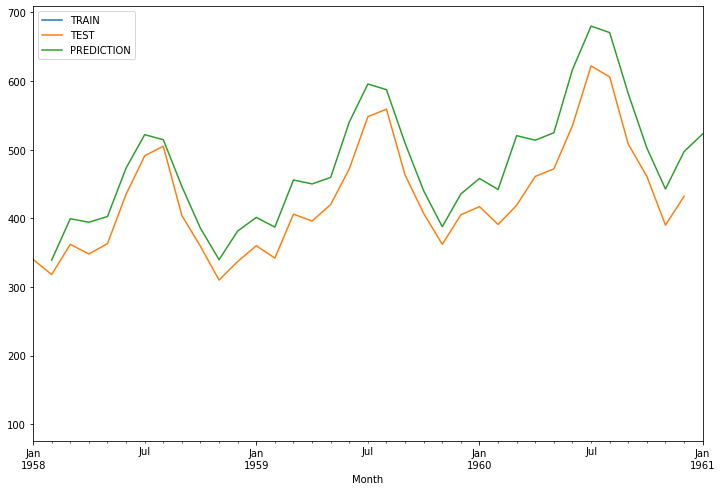

In [14]:
## Zoom in

train_data['Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 8))
test_data['Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1961-01-01'])

### Evaluation Metrics

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
test_data.describe()

,Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [19]:
mean_absolute_error(test_data, test_predictions)

63.031128975516594

In [20]:
mean_squared_error(test_data, test_predictions)

5614.257717399323

In [21]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92835055837892

In [22]:
final_model  = ExponentialSmoothing(df['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\CHS9NA\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [23]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Month'>

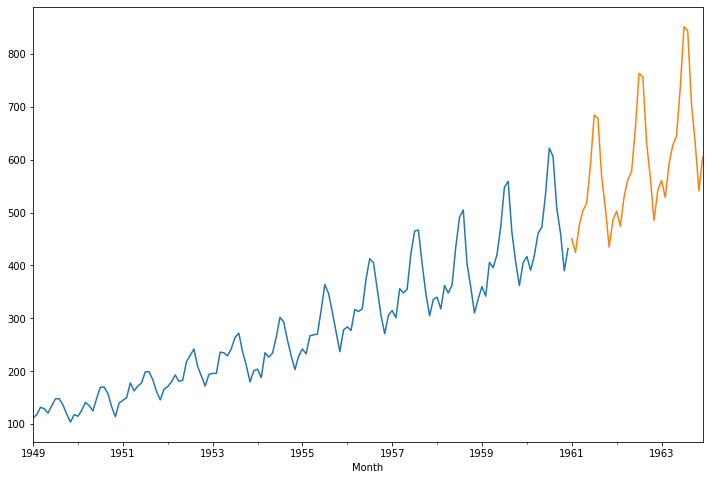

In [24]:
df['Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()